In [81]:
import pandas as pd
import numpy as np

In [82]:
# Read data from CSV
data = pd.read_csv('^NSEI.csv')

In [83]:
# Calculate Moving Averages (MA)
def calculate_moving_average(data, window):
    return data['Close'].rolling(window=window).mean()

data['MA_10'] = calculate_moving_average(data, 10)
data['MA_20'] = calculate_moving_average(data, 20)


In [84]:
# Calculate MACD
def calculate_macd(data, short_window, long_window, signal_window):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, min_periods=1).mean()
    macd_histogram = macd_line - signal_line
    return macd_line, signal_line, macd_histogram

data['MACD_line'], data['Signal_line'], data['MACD_histogram'] = calculate_macd(data, 12, 26, 9)


In [85]:
# Calculate RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI_14'] = calculate_rsi(data, 14)

In [86]:
# Calculate Bollinger Bands
data['RollingMean'] = data['Close'].rolling(window=20).mean()
data['RollingStd'] = data['Close'].rolling(window=20).std()
data['UpperBand'] = data['RollingMean'] + (2 * data['RollingStd'])
data['LowerBand'] = data['RollingMean'] - (2 * data['RollingStd'])

In [87]:
# Print or visualize the calculated indicators
print(data[['Date', 'Close', 'MA_10', 'MA_20', 'MACD_line', 'Signal_line', 'MACD_histogram', 'RSI_14', 'RollingMean', 'RollingStd', 'UpperBand', 'LowerBand' ]])

            Date         Close         MA_10         MA_20   MACD_line  \
0     2007-09-17   4494.649902           NaN           NaN    0.000000   
1     2007-09-18   4546.200195           NaN           NaN    1.156577   
2     2007-09-19   4732.350098           NaN           NaN    7.246206   
3     2007-09-20   4747.549805           NaN           NaN   10.387082   
4     2007-09-21   4837.549805           NaN           NaN   15.456420   
...          ...           ...           ...           ...         ...   
4091  2024-04-15  22272.500000  22523.305274  22283.962500  126.707513   
4092  2024-04-16  22147.900391  22491.895313  22284.025000   93.726592   
4093  2024-04-18  21995.849609  22446.150195  22282.650000   54.689323   
4094  2024-04-19  22147.000000  22417.385156  22287.215039   35.538908   
4095  2024-04-22  22280.000000  22393.920117  22310.342578   30.739707   

      Signal_line  MACD_histogram     RSI_14   RollingMean  RollingStd  \
0        0.000000        0.000000    

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Define features (including RSI) and target variable
X = data[['Close', 'RSI_14']]
y = data['Close'] 
data['Close']

0        4494.649902
1        4546.200195
2        4732.350098
3        4747.549805
4        4837.549805
            ...     
4091    22272.500000
4092    22147.900391
4093    21995.849609
4094    22147.000000
4095    22280.000000
Name: Close, Length: 4096, dtype: float64

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

1299     5929.600098
1338     5932.950195
3873    18321.150391
2083     7109.549805
1498     5928.399902
            ...     
1767     8389.900391
3919    19753.800781
2629    10806.500000
1427     5609.100098
67       5985.100098
Name: Close, Length: 820, dtype: float64

In [91]:


from sklearn.impute import SimpleImputer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Impute missing target values using mean imputation
target_imputer = SimpleImputer(strategy='mean')
y_train = target_imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = target_imputer.fit_transform(y_test.values.reshape(-1, 1)).ravel()

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 1.0
Testing R^2 Score: 0.9999795623677374


In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a LinearRegression model
model = LinearRegression()

# Fit the model with training data
model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)



Training MSE: 1.7544763389269575e-24
Testing MSE: 479.78666823212313
Training MAE: 7.856746050114124e-13
Testing MAE: 2.023793430853385


In [93]:


from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import make_scorer, r2_score
from scikeras.wrappers import KerasRegressor

# Define a function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create KerasRegressor wrapper for use with scikit-learn
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 150],
    'optimizer': ['adam', 'rmsprop'],
}

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=make_scorer(r2_score))
grid_result = grid.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_result.best_params_)

# Evaluate the best model on the testing set
best_model = grid_result.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Testing R^2 Score (Best Model):", test_score)



/Users/arihansinha/Library/Python/3.9/lib/python/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/arihansinha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [94]:
data_2 = imputer.transform(X_test)
Class = data_2[:, 0]  # First column
RSI_14 = data_2[:, 1]  # Second column


Training MSE (Best Model): 21.982576538689234
Testing MSE (Best Model): 490.93295945454497
Training MAE (Best Model): 1.3478547901869062
Testing MAE (Best Model): 3.20864675642128


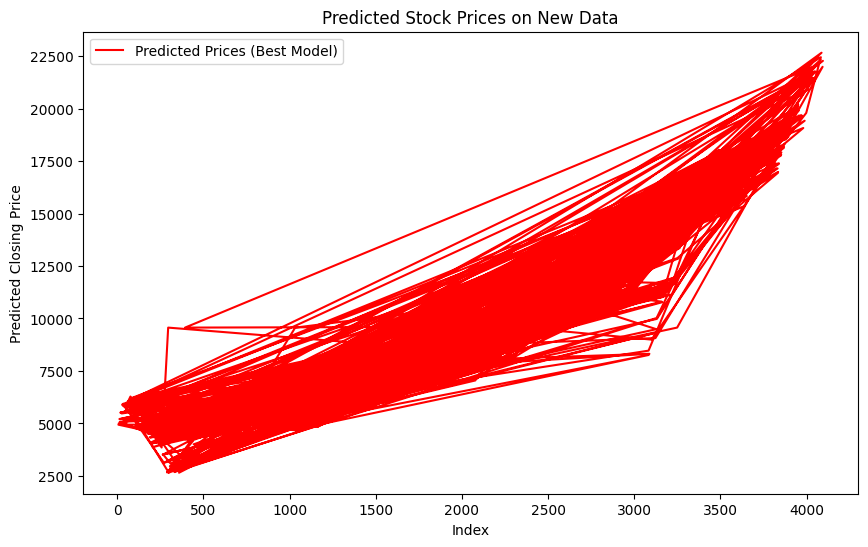

In [96]:
import matplotlib.pyplot as plt
import joblib

# Save the best model
# joblib.dump(best_model, 'best_model.pkl')

# Visualize the predicted vs actual prices using the best model
y_train_pred_best = best_model.predict(X_train_scaled)
y_test_pred_best = best_model.predict(X_test_scaled)

# Calculate evaluation metrics for the best model
train_mse_best = mean_squared_error(y_train, y_train_pred_best)
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
train_mae_best = mean_absolute_error(y_train, y_train_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)

print("Training MSE (Best Model):", train_mse_best)
print("Testing MSE (Best Model):", test_mse_best)
print("Training MAE (Best Model):", train_mae_best)
print("Testing MAE (Best Model):", test_mae_best)

# Make predictions on new data
# Assuming you have new unseen data named 'unseen_data'
x = imputer.transform(X_test)
unseen_data_imputed = np.column_stack((Class, RSI_14))
unseen_data_scaled = scaler.transform(unseen_data_imputed)
unseen_predictions = best_model.predict(unseen_data_scaled)



# Visualize the predicted prices for the new data
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, unseen_predictions, label='Predicted Prices (Best Model)', color='red')
plt.title('Predicted Stock Prices on New Data')
plt.xlabel('Index')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.show()




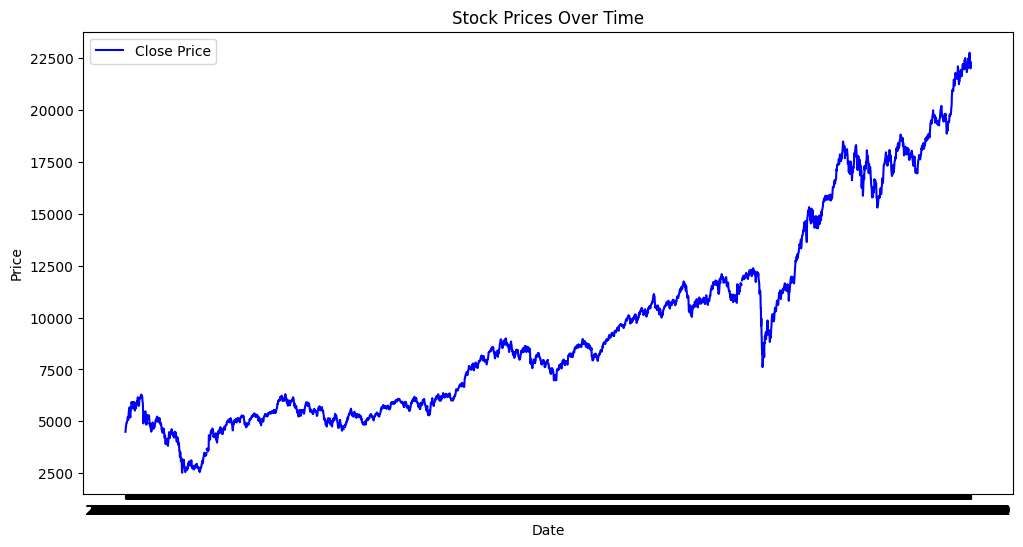

In [99]:
import matplotlib.pyplot as plt

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MACD_line,Signal_line,MACD_histogram,RSI_14,RollingMean,RollingStd,UpperBand,LowerBand
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0,NaN,NaN,1.156577,0.642543,0.514034,NaN,NaN,NaN,NaN,NaN
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0,NaN,NaN,7.246206,3.348962,3.897244,NaN,NaN,NaN,NaN,NaN
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0,NaN,NaN,10.387082,5.733149,4.653933,NaN,NaN,NaN,NaN,NaN
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0,NaN,NaN,15.456420,8.625603,6.830818,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,2024-04-15,22339.050781,22427.449219,22259.550781,22272.500000,22272.500000,355500.0,22523.305274,22283.962500,126.707513,122.233132,4.474381,58.622045,22283.962500,281.843905,22847.650311,21720.274689
4092,2024-04-16,22125.300781,22213.750000,22079.449219,22147.900391,22147.900391,317300.0,22491.895313,22284.025000,93.726592,116.531824,-22.805232,51.649208,22284.025000,281.811990,22847.648980,21720.401020
4093,2024-04-18,22212.349609,22326.500000,21961.699219,21995.849609,21995.849609,456900.0,22446.150195,22282.650000,54.689323,104.163324,-49.474001,49.725296,22282.650000,283.214401,22849.078802,21716.221198
4094,2024-04-19,21861.500000,22179.550781,21777.650391,22147.000000,22147.000000,362500.0,22417.385156,22287.215039,35.538908,90.438441,-54.899532,50.710598,22287.215039,280.082226,22847.379491,21727.050587


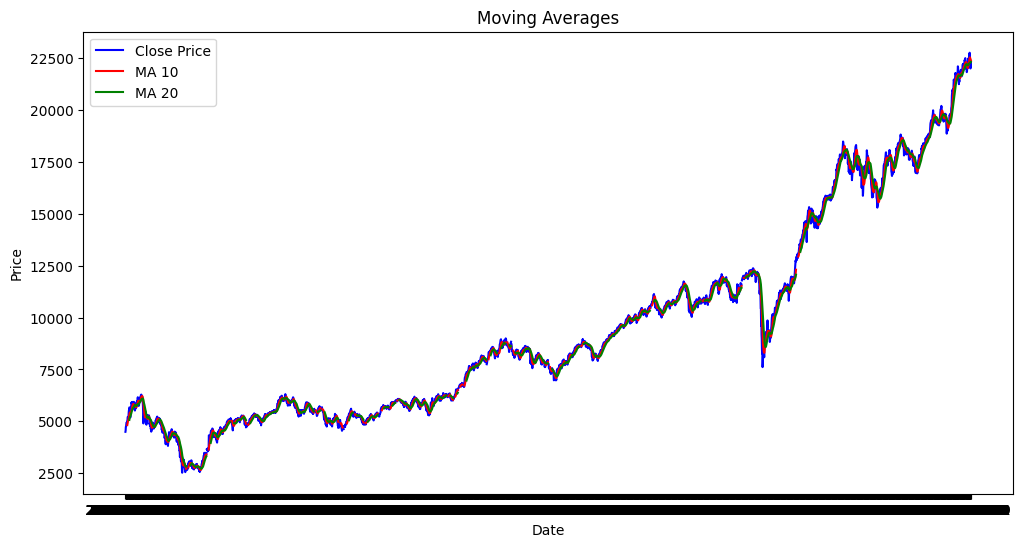

In [100]:
# Moving Averages Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA_10'], label='MA 10', color='red')
plt.plot(data['Date'], data['MA_20'], label='MA 20', color='green')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


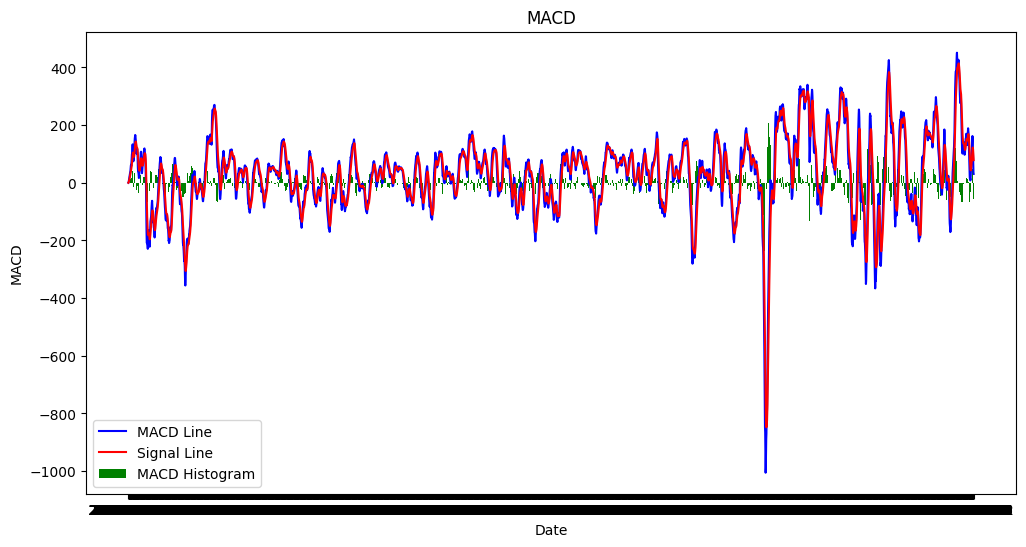

In [101]:
# MACD Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['MACD_line'], label='MACD Line', color='blue')
plt.plot(data['Date'], data['Signal_line'], label='Signal Line', color='red')
plt.bar(data['Date'], data['MACD_histogram'], label='MACD Histogram', color='green')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


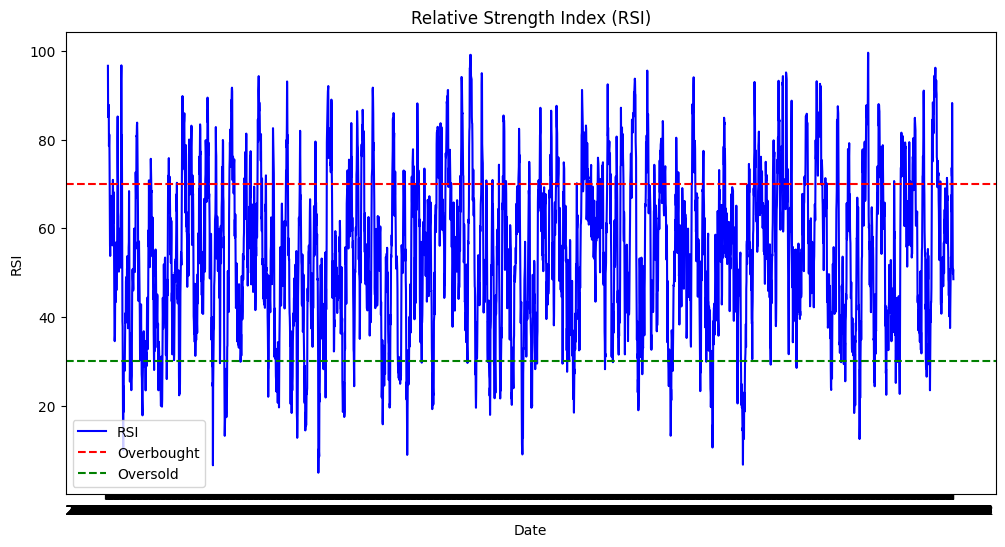

In [102]:
# RSI Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['RSI_14'], label='RSI', color='blue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


In [ ]:
# Bollinger Bands Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['RollingMean'], label='Rolling Mean', color='red')
plt.fill_between(data['Date'], data['UpperBand'], data['LowerBand'], color='gray', alpha=0.3)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
